#### Imports

In [1]:
import librosa
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set current working directory to parent folder
os.chdir(os.path.abspath(".."))

#### Files

In [2]:
# Archivos importantes y paths
df_annotations = pd.read_excel('data/annotations.xlsx')

# Omitimos todos los audios en development
df_annotations = df_annotations[df_annotations['Type'] != 'Development'].reset_index(drop = True)

#### Gráficos

In [3]:
def obtener_anotaciones(conversation, emocion):

    time = pd.DataFrame()

    df_file = df_annotations[(df_annotations['Emotion'] == emocion) & (df_annotations['Conversation_Part'] == conversation)]
    
    for annotation, annotator in zip(df_file['Annotation_File'], df_file['Annotator']):
        temp_df = pd.read_csv(f'data/MSPCORPUS/Annotations/{emocion}/{annotation}', skiprows=9, header=None, names=['Time', 'Annotation'])
        temp_df['Annotator'] = annotator
        time = pd.concat([time, temp_df], ignore_index = True)
    
    df_pivot = pd.DataFrame(time.pivot_table(columns = 'Annotator', index = 'Time', values = 'Annotation').to_records()).set_index('Time')
    df_pivot = df_pivot.fillna(method='ffill')
    #df_pivot['Vote'] = df_pivot.mean(axis = 1)
    df_pivot['Emotion'] = emocion
    #df_pivot['Vote_Roll'] = df_pivot['Vote'].rolling(200).mean()
    df_pivot = df_pivot.reset_index()
    
    return df_pivot

C:\Users\emanu\AppData\Local\Temp\ipykernel_784\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')


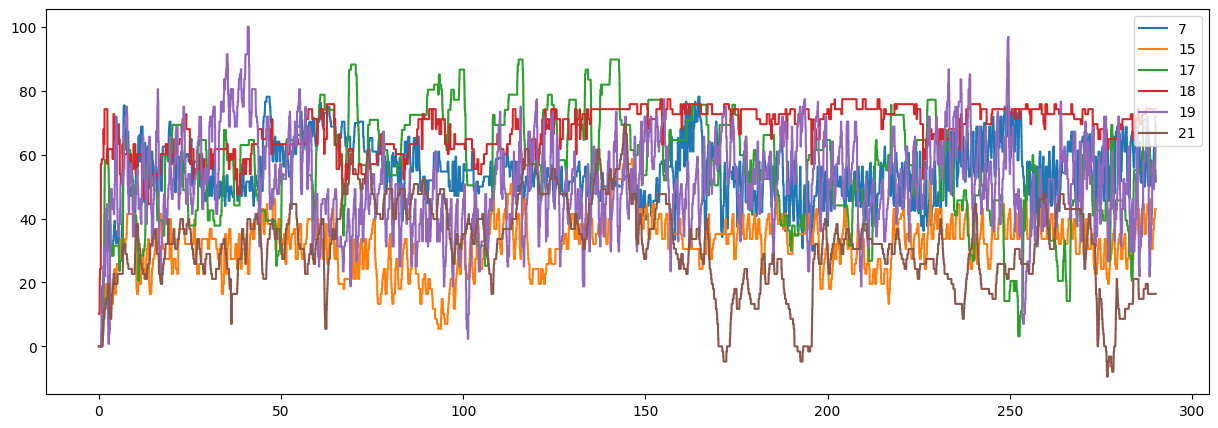

In [54]:
df_graf = obtener_anotaciones('MSP-Conversation_2215_2', 'Arousal')

graficos = df_graf.drop(['Time','Emotion'], axis = 1).columns

plt.figure(figsize = (15,5))
for grafico in graficos:
    if grafico == 'Vote_Roll':
        plt.plot(df_graf['Time'], df_graf[grafico], label = grafico, linewidth = 3)
    else:
        plt.plot(df_graf['Time'], df_graf[grafico], label = grafico)
    
plt.legend(loc = "upper right")
plt.xticks()
plt.show()

#### Cálculo Cronbach’s Alpha 

In [37]:
import pingouin as pg

emociones = ['Valence','Dominance','Arousal']

X = []

for anotacion in df_annotations['Conversation_Part'].unique():
    
    for emocion in emociones:
        
        x = []
        
        df_graf = obtener_anotaciones(anotacion, emocion)
        df_graf = df_graf.drop(['Time','Emotion'], axis = 1)
        
        x.append(emocion)
        x.append(anotacion)
        x.append(pg.cronbach_alpha(data = df_graf)[0])
        
        X.append(x)

df_votacion = pd.DataFrame(X, columns = ['Emocion','Conversation_Part','Cronbanch'])

df_votacion.to_excel('data/cronbanch_parts.xlsx',index = False)

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')


Ahora que ya tengo el cronbanch para cada uno de las conversation_part, puedo sacar los anotares segun conversation part

In [7]:
df_votacion.head()

,Emocion,Conversation_Part,Cronbanch
0,Valence,MSP-Conversation_0021_1,0.676759
1,Dominance,MSP-Conversation_0021_1,0.695732
2,Arousal,MSP-Conversation_0021_1,0.608602
3,Valence,MSP-Conversation_0021_2,0.521342
4,Dominance,MSP-Conversation_0021_2,0.463295


In [14]:
# Merge con annotations
df_final = pd.merge(df_votacion, df_annotations, how = 'left', left_on = ['Conversation_Part','Emocion'], right_on = ['Conversation_Part','Emotion']).drop('Emotion', axis = 1)

In [28]:
emociones = ['Valence','Arousal','Dominance']
annotators = df_final['Annotator'].unique()
X = []

for emocion in emociones:
    for annotator in annotators:
        
        convs = df_final[(df_final['Annotator'] == annotator) & (df_final['Emocion'] == emocion)]['Conversation_Part'].unique()
        
        # Sin
        df_restantes = df_final[(~df_final['Conversation_Part'].isin(convs)) & (df_final['Emocion'] == emocion)]
        val_sin = df_restantes[['Conversation_Part','Cronbanch']].drop_duplicates()['Cronbanch'].mean()
        
        # Con
        df_restantes = df_final[(df_final['Conversation_Part'].isin(convs)) & (df_final['Emocion'] == emocion)]
        val_con = df_restantes[['Conversation_Part','Cronbanch']].drop_duplicates()['Cronbanch'].mean()
        
        x = []
        x.append(annotator)
        x.append(emocion)
        x.append(val_sin)
        x.append(val_con)
        
        X.append(x)
        
df_cron = pd.DataFrame(X, columns = ['Anotador','Emocion','Sin','Con'])
df_cron['Diferencia'] = df_cron['Con'] - df_cron['Sin']

In [66]:
df_cron.groupby('Anotador')[['Diferencia']].mean().reset_index().sort_values('Diferencia')

,Anotador,Diferencia
16,19,-0.157579
14,17,-0.143963
15,18,-0.123352
18,21,-0.093907
13,16,-0.073443
17,20,-0.073306
12,15,-0.072267
10,13,-0.071690
23,26,-0.069042
22,25,-0.061035


In [57]:
df_cron.sort_values('Diferencia').head(50)

,Anotador,Emocion,Sin,Con,Diferencia
42,18,Arousal,0.416989,0.220718,-0.196271
71,16,Dominance,0.366775,0.176750,-0.190025
39,19,Arousal,0.478488,0.299033,-0.179455
65,19,Dominance,0.459285,0.296711,-0.162574
35,17,Arousal,0.505167,0.346015,-0.159152
43,26,Arousal,0.386380,0.228815,-0.157565
61,17,Dominance,0.482936,0.327423,-0.155513
46,21,Arousal,0.398439,0.242996,-0.155443
13,19,Valence,0.583485,0.452777,-0.130709
60,13,Dominance,0.473823,0.343556,-0.130267


In [50]:
df_annotations[(df_annotations['Annotator'] == 18) & (df_annotations['Emotion'] == 'Arousal')]['Conversation_Part'].unique()

array(['MSP-Conversation_1926_1', 'MSP-Conversation_0372_3',
       'MSP-Conversation_0417_2', 'MSP-Conversation_0417_3',
       'MSP-Conversation_0420_2', 'MSP-Conversation_0420_4',
       'MSP-Conversation_0489_2', 'MSP-Conversation_0541_2',
       'MSP-Conversation_0563_4', 'MSP-Conversation_0611_1',
       'MSP-Conversation_0611_2', 'MSP-Conversation_0611_3',
       'MSP-Conversation_0700_1', 'MSP-Conversation_0706_2',
       'MSP-Conversation_0782_2', 'MSP-Conversation_0782_3',
       'MSP-Conversation_0792_2', 'MSP-Conversation_0802_1',
       'MSP-Conversation_0858_1', 'MSP-Conversation_0893_1',
       'MSP-Conversation_0905_2', 'MSP-Conversation_0912_1',
       'MSP-Conversation_0912_2', 'MSP-Conversation_1116_3',
       'MSP-Conversation_1140_1', 'MSP-Conversation_1140_3',
       'MSP-Conversation_1413_1', 'MSP-Conversation_1413_2',
       'MSP-Conversation_1545_2', 'MSP-Conversation_1599_1',
       'MSP-Conversation_1609_2', 'MSP-Conversation_1637_1',
       'MSP-Conversation

In [41]:
df_cron.pivot(index = 'Anotador', columns = 'Emocion', values = ['Sin','Con'])

Sin                           Con                    
Emocion    Arousal Dominance   Valence   Arousal Dominance   Valence
Anotador                                                            
2         0.363421  0.346473  0.502234  0.506016  0.467526  0.568276
4         0.381188  0.360714  0.509470  0.648188  0.631403  0.748803
5         0.346465  0.324667  0.481454  0.502583  0.480706  0.603138
6         0.346465  0.324667  0.481454  0.502583  0.480706  0.603138
7         0.364790  0.359333  0.460966  0.387065  0.362234  0.520082
8         0.360399  0.339764  0.493290  0.522556  0.493613  0.618800
9         0.340970  0.324595  0.475772  0.446007  0.414668  0.558338
10        0.349973  0.333358  0.491092  0.409741  0.385249  0.527092
11        0.366649  0.342636  0.500179  0.504535  0.532901  0.599671
12        0.383447  0.360147  0.510279       NaN  0.535535       NaN
13        0.418649  0.473823  0.546103  0.376191  0.343556  0.503760
14        0.374810  0.355313  0.504440  0.415646  0.391211  0.536997
15        0.401851  0.374351  0.518655  0.301141  0.304091  0.472823
16        0.385014  0.366775  0.509957  0.346429  0.176750  0.518238
17        0.505167  0.482936  0.602710  0.346015  0.327423  0.485486
18        0.416989  0.379832  0.527795  0.220718  0.293775  0.440068
19        0.478488  0.459285  0.583485  0.299033  0.296711  0.452777
20        0.408393  0.378352  0.523479  0.318496  0.304049  0.467760
21        0.398439  0.366057  0.515739  0.242996  0.300651  0.454865
22        0.382772  0.367637  0.509811  0.395645  0.245223  0.525189
23        0.386194  0.367392  0.518676  0.361213  0.304332  0.433119
24        0.383792  0.362881  0.513861  0.378128  0.329290  0.417640
25        0.385102  0.364056  0.520784  0.348872  0.338905  0.399059
26        0.386380  0.362064  0.512478  0.228815  0.355811  0.469171
27        0.383447  0.361532  0.510240       NaN  0.368013  0.513592
28        0.383447  0.359735  0.510279       NaN  0.583838       NaN